In [1]:
import pydpmd as dp
from pydpmd.plot import draw_particles_frame
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
from pydpmd.data import load
import numpy as np
from numba import njit
from scipy.spatial import cKDTree
from pydpmd.calc import run_binned, run_binned_ragged, fused_msd_kernel, TimeBins, LagBinsExact, LagBinsLog, LagBinsLinear, LagBinsPseudoLog, requires_fields

/var/folders/f5/gw8thzr169xd6l47yn540sf80000gn/T/ipykernel_42579/1789584689.py:15: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter([mu] * len(data.packing_fraction), data.packing_fraction, c=cmap(nv_norm(nv)), zorder=0, alpha=0.5)


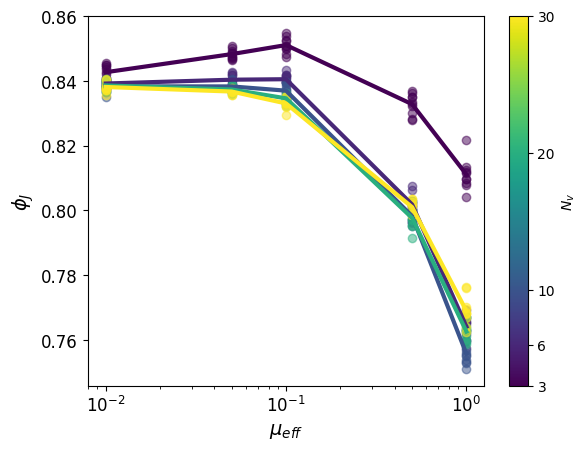

In [2]:
nv_values = [3, 6, 10, 20, 30]
nv_norm = plt.Normalize(min(nv_values), max(nv_values))
cmap = plt.cm.viridis
phi_j_data = {
    'mu': [],
    'nv': [],
    'phi_j': []
}
for nv in nv_values:
    x, y = [], []
    for mu in [1.00, 0.50, 0.10, 0.05, 0.01]:
        path = f'/Users/marshallmccraw/Projects/yale/data/s-25/10-02-25/grace-data/jamming/{nv}-{mu:.2f}/jamming_0'
        data = dp.data.load(path, location=['final', 'init'], load_trajectory=True, load_full=False)
        data.calculate_mu_eff()
        plt.scatter([mu] * len(data.packing_fraction), data.packing_fraction, c=cmap(nv_norm(nv)), zorder=0, alpha=0.5)
        x.append(mu)
        y.append(np.mean(data.packing_fraction))
        phi_j_data['mu'].append(data.mu_eff[0])
        phi_j_data['nv'].append(nv)
        phi_j_data['phi_j'].append(np.mean(data.packing_fraction))
    plt.plot(x, y, c=cmap(nv_norm(nv)), lw=3)
plt.xscale('log')
sm = plt.cm.ScalarMappable(norm=nv_norm, cmap=cmap)
sm.set_array(nv_values)
cbar = plt.colorbar(sm, ax=plt.gca(), label=r'$N_v$', ticks=[3, 6, 10, 20, 30])
plt.xlabel(r'$\mu_{eff}$', fontsize=14)
plt.ylabel(r'$\phi_J$', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig('figures/phi_j.png', dpi=300)
plt.show()

phi_j_data = pd.DataFrame(phi_j_data)
phi_j_data.to_csv('phi_j_data.csv', index=False)